# Сборный проект 2

# Аналитический кейс на примере мобильного приложения по продаже продуктов питания

**Описание проекта**

Стартапу, который продаёт продукты питания, нужно разобраться, как ведут себя пользователи мобильного приложения. 
Необходимо изучить воронку продаж. Узнать, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого необходимо исследовать результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Нужно выяснить, какой шрифт лучше.
Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, можно быть уверенным в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

В случае общей аналитики и A/A/B-эксперимента нужно работать с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

**Описание данных**

Датасет `logs_exp.csv` - лог сервера с информацией об использовании приложения. Каждая запись в логе — это действие пользователя, или событие.

- EventName — название события;
- DeviceIDHash — уникальный идентификатор пользователя;
- EventTimestamp — время события;
- ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

**Последовательность выполнения проекта**

**Шаг 1. Откройте файл с данными и изучите общую информацию**

Путь к файлу: `/datasets/logs_exp.csv`.

**Шаг 2. Подготовьте данные**

- Замените названия столбцов на удобные для вас;
- Проверьте пропуски и типы данных. Откорректируйте, если нужно;
- Добавьте столбец даты и времени, а также отдельный столбец дат.

**Шаг 3. Изучите и проверьте данные**

- Сколько всего событий в логе?
- Сколько всего пользователей в логе?
- Сколько в среднем событий приходится на пользователя?
- Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Изучите, как меняется количество данных: постройте столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?
- Много ли событий и пользователей вы потеряли, отбросив старые данные?
- Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

**Шаг 4. Изучите воронку событий**

- Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.
- Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.
- Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
- По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
- На каком шаге теряете больше всего пользователей?
- Какая доля пользователей доходит от первого события до оплаты?

**Шаг 5. Изучите результаты эксперимента**

- Сколько пользователей в каждой экспериментальной группе?
- Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.
- Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
- Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
- Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 в 10% случаев можно ошибочно отклонить нулевую гипотезу при условии, что она верна. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

**Шаг 6. Напишите общие выводы**

### Шаг 1. Откроем файл с данными и изучим общую информацию

Считаем данные из csv-файла в датафрейм и сохраним в пременную `logs`. Путь к файлу: `/datasets/logs_exp.csv`

In [1]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math as mth

In [2]:
try:
    logs = pd.read_csv('/datasets/logs_exp.csv', sep = '\t')
except:
    logs = pd.read_csv('https://code.s3.yandex.net/datasets/logs_exp.csv', sep = '\t')

Зададим функцию для вывода всей информации о таблице.

In [3]:
def df_info(df):
    print('\033[1m' + 'Первые 20 строк таблицы:' + '\033[0m')
    display(df.head(20))
    print()
    print('\033[1m' + 'Общая информация о таблице:' + '\033[0m')
    print(df.info())
    print()
    print('\033[1m' + 'Количество пропусков в таблице:' + '\033[0m')
    print(df.isna().sum())
    print()
    print('\033[1m' + 'Количество дубликатов в таблице:' + '\033[0m')
    print(df.duplicated().sum())

Выведем основную информацию о датафрейме `logs`.

In [4]:
df_info(logs)

Первые 20 строк таблицы:


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246



Общая информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None

Количество пропусков в таблице:
EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

Количество дубликатов в таблице:
413


Таблица содержит 413 дубликатов, посчитаем их долю, чтобы понимать, какую часть данных они занимают.

In [5]:
duplicates_share = round(logs.duplicated().sum() / logs.shape[0], 4)
print('Доля дубликатов в данных составляет', duplicates_share)

Доля дубликатов в данных составляет 0.0017


Доля дубликатов менее 1%.

На этом этапе данные считаны из файла и сохранены в переменной `logs`. Датафрейм содержитсодержит 244126 строк, 4 столбца. В датафрейме есть дубликаты, пропуски отсутствуют.

### Шаг 2. Подготовим данные

Заменим названия столбцов.

In [6]:
logs = logs.rename(columns = {'EventName' : 'event', 'DeviceIDHash' : 'user', 'EventTimestamp' : 'timestamp', 'ExpId' : 'group'})

Таблица содержит дубликаты, удалим их.

In [7]:
logs = logs.drop_duplicates().reset_index(drop=True)

Добавим столбец даты и времени, а также отдельный столбец дат.

In [8]:
logs['datetime'] = logs['timestamp'].apply(lambda x: dt.fromtimestamp(x))
logs['date'] = logs['timestamp'].apply(lambda x: dt.fromtimestamp(x).date())

Выведемм информацию о датафрейме после всех изменений

In [9]:
df_info(logs)

Первые 20 строк таблицы:


,event,user,timestamp,group,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 07:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 14:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 14:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 14:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 14:48:42,2019-07-25
5,CartScreenAppear,6217807653094995999,1564055323,248,2019-07-25 14:48:43,2019-07-25
6,OffersScreenAppear,8351860793733343758,1564066242,246,2019-07-25 17:50:42,2019-07-25
7,MainScreenAppear,5682100281902512875,1564085677,246,2019-07-25 23:14:37,2019-07-25
8,MainScreenAppear,1850981295691852772,1564086702,247,2019-07-25 23:31:42,2019-07-25
9,MainScreenAppear,5407636962369102641,1564112112,246,2019-07-26 06:35:12,2019-07-26



Общая информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   event      243713 non-null  object        
 1   user       243713 non-null  int64         
 2   timestamp  243713 non-null  int64         
 3   group      243713 non-null  int64         
 4   datetime   243713 non-null  datetime64[ns]
 5   date       243713 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 11.2+ MB
None

Количество пропусков в таблице:
event        0
user         0
timestamp    0
group        0
datetime     0
date         0
dtype: int64

Количество дубликатов в таблице:
0


Проверим, есть ли в таблице пользователи, оказавшиеся одновременно в нескольких группах. При А/В-тестировании могут быть ошибки при логировании и распределении пользователей по группам.

In [10]:
logs_mis = logs.pivot_table(
    index='user',
    values='group',
    aggfunc='nunique'
)

logs_mis.query('group > 1').count()

group    0
dtype: int64

Ошибки при логировании не обнаружены. Таблица содержит только пользователей, каждый из которых относится только к одной группе.

На этом этапе названия столбцов изменены и переведены в `snake_case`. Форматы столбцов приведены в соответствие с их содержанием. Удалены дубликаты. Добавлен столбец даты и времени, а также отдельный столбец дат. Также проведена проверка на наличие ошибок логирования при проведении эксперимента, ошибки отсутствуют. Итоговый датафрейм `logs` содержит 243713 строк, 6 столбцов.

### Шаг 3. Изучим и проверим данные

Проверим, сколько всего событий в логе.

In [11]:
print('В логе всего', logs['event'].count(), 'событий')

В логе всего 243713 событий


Проверим, сколько всего пользователей в логе.

In [12]:
print('В логе всего', logs['user'].nunique(), 'пользователей')

В логе всего 7551 пользователей


Посчитаем, сколько в среднем событий приходится на одного пользователя.

In [13]:
print('В среднем на одного пользователя приходится', round(logs['event'].count()/logs['user'].nunique(), 0), 'события')

В среднем на одного пользователя приходится 32.0 события


В качестве дополнительного исследования можно проверить, существование аномальных пользователей. Построим гистограмму распределения количества событий, совершенных пользователеми.

In [14]:
events_by_user = logs.groupby('user')['event'].count()

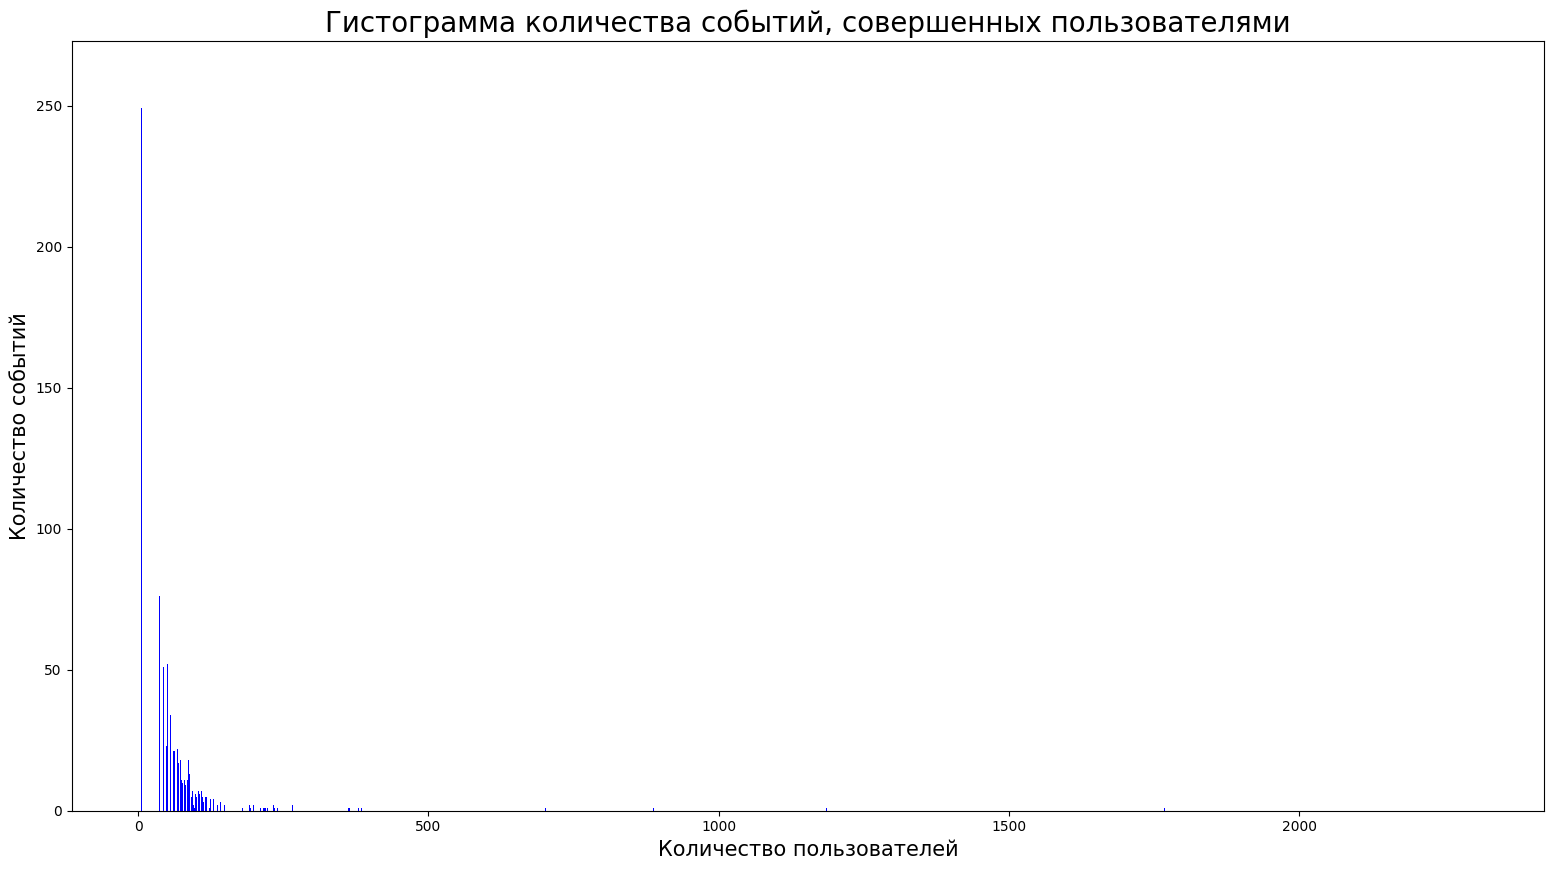

In [15]:
plt.figure(figsize=(19,10))
plt.hist(events_by_user, color = 'blue', bins = 5000)
plt.title('Гистограмма количества событий, совершенных пользователями', fontsize = 20)
plt.xlabel('Количество пользователей', fontsize=15)
plt.ylabel('Количество событий', fontsize=15);

На гистограмме видно, что есть достаточно большой хвост вправо, что говорит о том, что достаточно большое количество пользователей совершало единичные события. С другой стороны есть пользователи, которые наоборот совершали очень много событий.

Проверим, данными за какой период мы располагаем. Найдем максимальную и минимальную дату.

In [16]:
print('Максимальная дата в  логе -', logs['date'].max())
print('Минимальная дата в  логе -', logs['date'].min())

Максимальная дата в  логе - 2019-08-08
Минимальная дата в  логе - 2019-07-25


Мы располагаем данными за 14 дней с 25 июля 2019 года по 7 августа 2019 года.

Изучим, как меняется количество данных в зависимости от времени в разрезе групп.

In [17]:
events_by_date = logs.pivot_table(index='date', columns='group', values='event', aggfunc='count')
events_by_date

group,246,247,248
date,,,
2019-07-25,4,1,4
2019-07-26,14,8,8
2019-07-27,24,23,8
2019-07-28,32,36,36
2019-07-29,53,58,70
2019-07-30,127,129,141
2019-07-31,371,402,440
2019-08-01,11598,11959,12210
2019-08-02,10955,11240,13376


Построим столбчатую диаграмму, которая отобразит количество событий в зависимости от времени в разрезе групп.

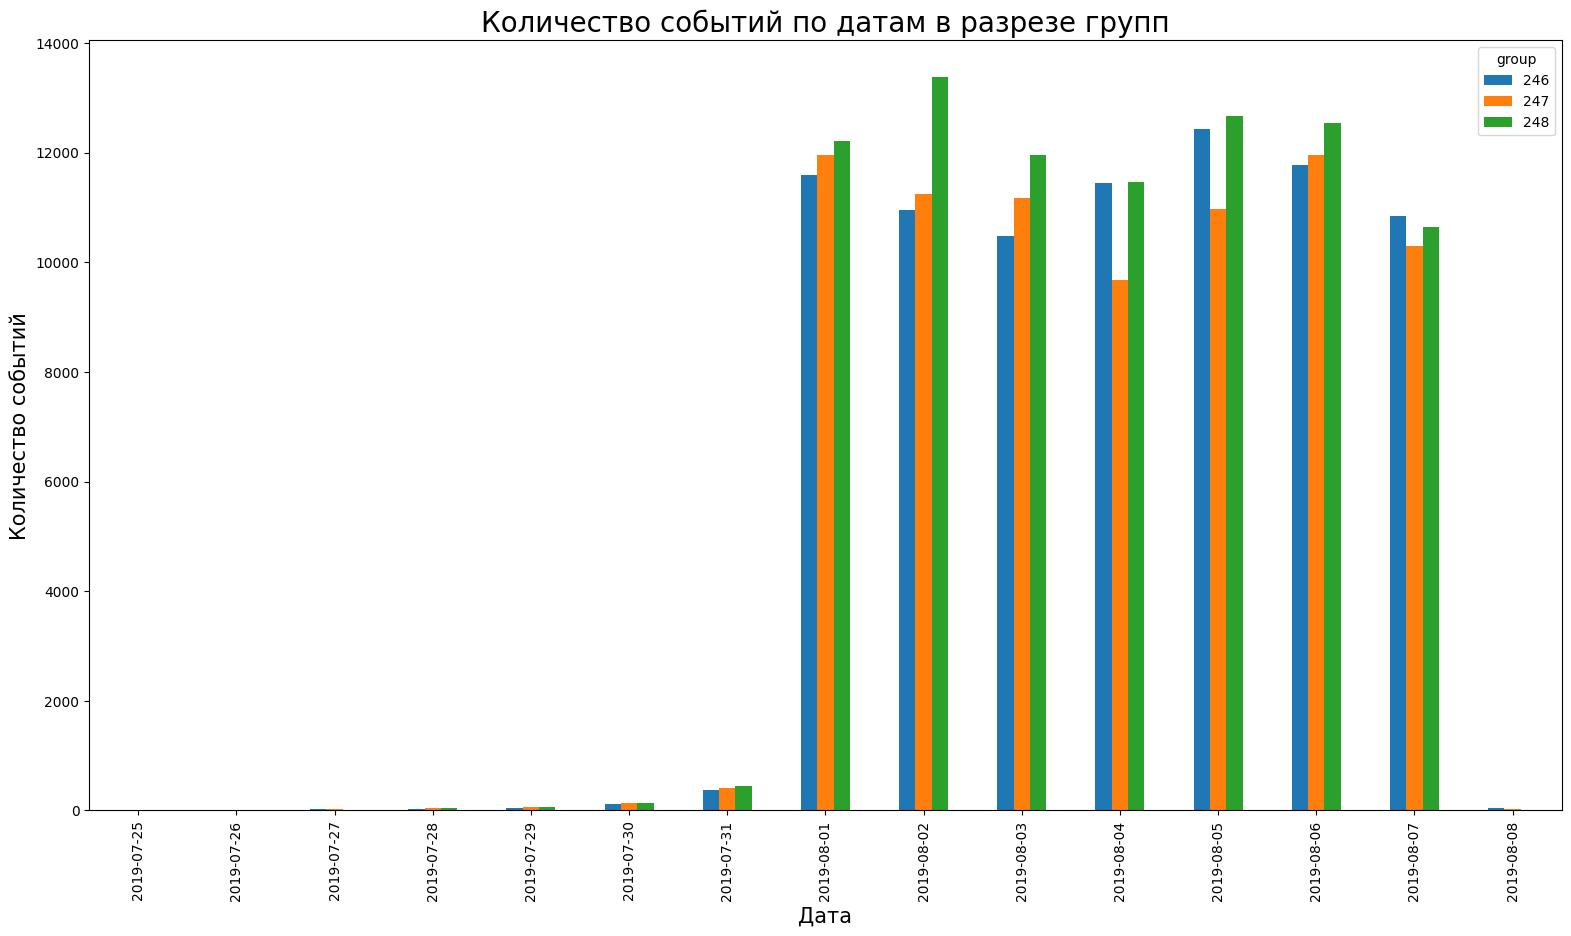

In [18]:
events_by_date.plot(kind='bar', figsize=(19, 10))
plt.title('Количество событий по датам в разрезе групп', fontsize = 20)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Количество событий', fontsize=15);

На диаграммме явно видно, что данные значительно различаются в зависимости от даты. До 31 июля 2019 года вклюючительно количество событий незначительно. Мы имеем полные данные начиная с 1 августа 2019 года, т.е фактически располагаем данными за 7 дней с 1 по 7 августа 2019 года. Отбросим более старые данные.

In [19]:
cutoff_date = pd.to_datetime("2019-07-31")
logs_act = logs.query('date > @cutoff_date.date()')

Проверим, много ли событий и пользователей мы потеряли, отбросив старые данные.

In [20]:
print(
    'Отбросив старые данные, мы потеряли',
    logs['event'].count() - logs_act['event'].count(),
    'событий, что составляет',
    '{0:.2%}'.format((logs['event'].count() - logs_act['event'].count())/logs['event'].count()),
    'от изначальных данных' 
)
print(
    'Отбросив старые данные, мы потеряли',
    logs['user'].nunique() - logs_act['user'].nunique(),
    'пользователей, что составляет',
    '{0:.2%}'.format((logs['user'].nunique() - logs_act['user'].nunique())/logs['user'].nunique()),
    'от изначальных данных' 
)

Отбросив старые данные, мы потеряли 1989 событий, что составляет 0.82% от изначальных данных
Отбросив старые данные, мы потеряли 13 пользователей, что составляет 0.17% от изначальных данных


Такие потери являются приемлемыми и не окажут существенного влияния на дальнейший анализ.

На диаграмме видно, что  у нас есть пользователи из всех трёх экспериментальных групп. Проверим, сколько их в каждой группе.

In [21]:
users_by_group = logs_act.pivot_table(index='group', values='user', aggfunc='nunique')
users_by_group

,user
group,
246,2484
247,2517
248,2537


Количество пользователей в групах примерно одинаковое.

На этом этапе было проверено, сколько всего событий в логе, сколько всего пользователей в логе, посчитано, колько в среднем событий приходится на пользователя.

Было изучено, данными за какой период мы располагаем, найдены максимальная и минимальна даты. Также было изучено, как меняется количество данных в зависимости от времени в разрезе групп. Было проверено, данными за какой период времени мы располагаем на самом деле, более старые данные были отброшены.

Было расчитано, много ли событий и пользователей мы потеряли, отбросив старые данные. И проверено, что у нас остались пользователи из всех трёх экспериментальных групп и сколько пользователей в каждой группе.

### Шаг 4. Изучим воронку событий

Посмотрим, какие события есть в логах.

In [22]:
logs_act['event'].unique()

array(['MainScreenAppear', 'OffersScreenAppear',
       'PaymentScreenSuccessful', 'CartScreenAppear', 'Tutorial'],
      dtype=object)

Изучим, как часто они встречаются. Отсортируем события по частоте.

In [23]:
logs_act.groupby('event')['user'].count().sort_values(ascending=False)

event
MainScreenAppear           117889
OffersScreenAppear          46531
CartScreenAppear            42343
PaymentScreenSuccessful     33951
Tutorial                     1010
Name: user, dtype: int64

Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей.

In [24]:
event_funnel = logs_act.pivot_table(index='event', values='user', aggfunc='nunique').sort_values(by='user', ascending=False)
event_funnel

,user
event,
MainScreenAppear,7423
OffersScreenAppear,4597
CartScreenAppear,3736
PaymentScreenSuccessful,3540
Tutorial,843


Посчитаем долю пользователей, которые хоть раз совершали событие.

In [25]:
users_part_by_event = round(logs_act.pivot_table(index='event', values='user', aggfunc='nunique')/
                            logs_act['user'].nunique(), 2).reset_index().sort_values(by='user', ascending=False)
users_part_by_event.columns = ('event', 'users_share')
users_part_by_event

,event,users_share
1,MainScreenAppear,0.98
2,OffersScreenAppear,0.61
0,CartScreenAppear,0.50
3,PaymentScreenSuccessful,0.47
4,Tutorial,0.11


Исходя из данных мы видим следующую последовательность событий: `MainScreenAppear` → `OffersScreenAppear` → `CartScreenAppear` → `PaymentScreenSuccessful`, т.е пользователь последовательно проходит главный экран, экран с товарами, экран корзины, экран подтверждения оплаты. Также 11% пользователей посещают экран `Tutorial`, но это событие нельзя отнести к последовательной цепочке событий, связанных с продажами, поэтому не будем учитывать это событие при расчетах.

По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). Для этого сначала выделим количество пользователей каждого события в отдельную переменную.

In [26]:
users_share_msa = logs_act.query('event == "MainScreenAppear"')['user'].nunique()
print('Количество пользователей, совершивших событие MainScreeenAppear равно', users_share_msa)

Количество пользователей, совершивших событие MainScreeenAppear равно 7423


In [27]:
users_share_osa = logs_act.query('event == "OffersScreenAppear"')['user'].nunique()
print('Количество пользователей, совершивших событие OffersScreeenAppear равно', users_share_osa)

Количество пользователей, совершивших событие OffersScreeenAppear равно 4597


In [28]:
users_share_csa = logs_act.query('event == "CartScreenAppear"')['user'].nunique()
print('Количество пользователей, совершивших событие CartScreeenAppear равно', users_share_csa)

Количество пользователей, совершивших событие CartScreeenAppear равно 3736


In [29]:
users_share_pss = logs_act.query('event == "PaymentScreenSuccessful"')['user'].nunique()
print('Количество пользователей, совершивших событие PaymentScreenSuccessful равно', users_share_pss)

Количество пользователей, совершивших событие PaymentScreenSuccessful равно 3540


In [30]:
users_share_osa_msa = round(users_share_osa / users_share_msa, 2)
print('Доля пользователей, прошедших на шаг OfferScreenAppear равна', users_share_osa_msa)

Доля пользователей, прошедших на шаг OfferScreenAppear равна 0.62


In [31]:
users_share_csa_osa = round(users_share_csa / users_share_osa, 2)
print('Доля пользователей, прошедших на шаг CartScreenAppear равна', users_share_csa_osa)

Доля пользователей, прошедших на шаг CartScreenAppear равна 0.81


In [32]:
users_share_pss_csa = round(users_share_pss / users_share_csa, 2)
print('Доля пользователей, прошедших на шаг CartScreenAppear равна', users_share_pss_csa)

Доля пользователей, прошедших на шаг CartScreenAppear равна 0.95


Больше всего пользователей теряется при переходе к событию `OfferScreenAppear` - 38%.

Посчитаем также, какая доля пользователей доходит от первого события до оплаты.

In [33]:
users_share_pss_msa = round(users_share_pss / users_share_msa, 2)
print('Доля пользователей, дошедших от первого события до оплаты, равна', users_share_pss_msa)

Доля пользователей, дошедших от первого события до оплаты, равна 0.48


Построим столбчатую диаграмму воронки событий по количетву пользователей.

In [34]:
event_funnel_act = event_funnel.query('event != "Tutorial"')
event_funnel_act

,user
event,
MainScreenAppear,7423
OffersScreenAppear,4597
CartScreenAppear,3736
PaymentScreenSuccessful,3540


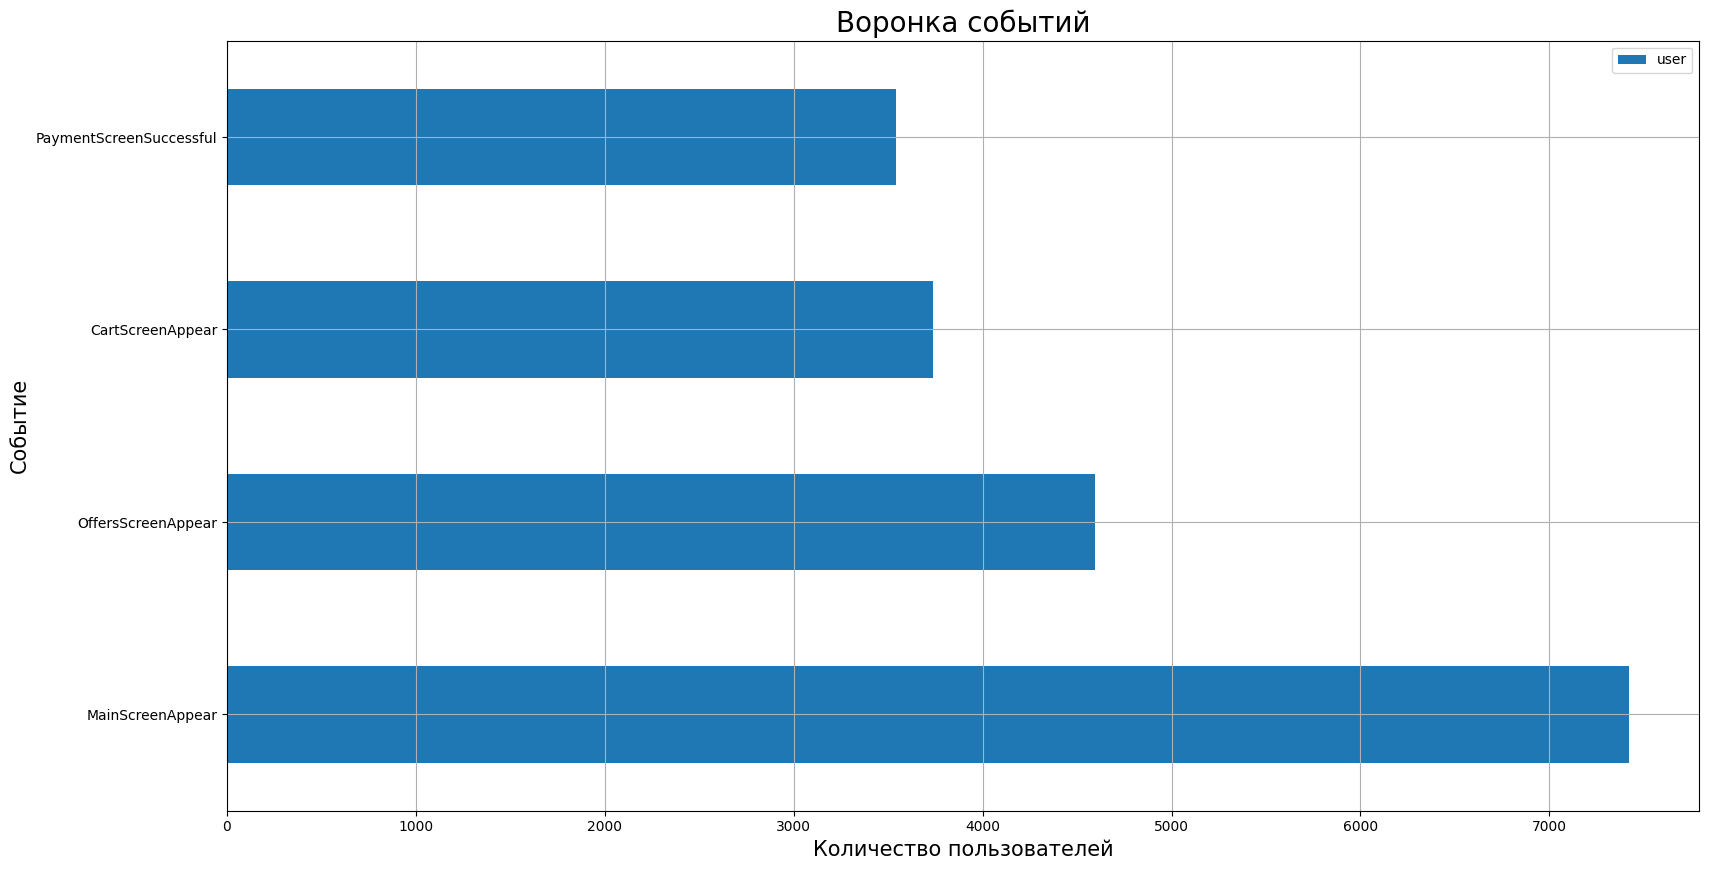

In [35]:
event_funnel_act.plot(kind='barh', figsize=(19, 10))
plt.title('Воронка событий', fontsize = 20)
plt.xlabel('Количество пользователей', fontsize=15)
plt.ylabel('Событие', fontsize=15)
plt.grid(True);

На этом этапе было изучено, какие события есть в логах, и как часто они встречаются. 

Было посчитано, сколько пользователей совершали каждое из событий, а также доля пользователей, которые хоть раз совершали событие.

Было описано, в каком порядке происходят события, какие события выстраиваются в последовательную цепочку, а какие нет.

По воронке событий было посчитано, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем).

Было определено, на каком шаге теряете больше всего пользователей, а также, какая доля пользователей доходит от первого события до оплаты.

### Шаг 5. Изучим результаты эксперимента

У нас есть данные, сколько пользователей в каждой экспериментальной группе.

In [36]:
users_by_group = users_by_group.reset_index()
users_by_group.columns = ('group', 'users_number')
users_by_group

,group,users_number
0,246,2484
1,247,2517
2,248,2537


Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками 246 и 247.

Самым популярным событием является `MainScreenAppear` . Посчитаем число пользователей, совершивших это событие в каждой из контрольных групп, а также долю пользователей, совершивших это событие. Для этого сначала запишем вотдельные переменные количество пользователей каждой группы.

In [37]:
users_246 = logs_act.query('group == 246')['user'].nunique()
print('Количество пользователей в группе 246 равно', users_246)
users_247 = logs_act.query('group == 247')['user'].nunique()
print('Количество пользователей в группе 247 равно', users_247)

Количество пользователей в группе 246 равно 2484
Количество пользователей в группе 247 равно 2517


In [38]:
users_246_msa = logs_act.query('event == "MainScreenAppear" and group == 246')['user'].nunique()
print('Количество пользователей группы 246, совершивших событие MainScreenAppear равно', users_246_msa)
users_247_msa = logs_act.query('event == "MainScreenAppear" and group == 247')['user'].nunique()
print('Количество пользователей группы 247, совершивших событие MainScreenAppear равно', users_247_msa)

Количество пользователей группы 246, совершивших событие MainScreenAppear равно 2450
Количество пользователей группы 247, совершивших событие MainScreenAppear равно 2479


In [39]:
users_246_msa_share = round(users_246_msa / users_246, 2)
print('Доля пользователей группы 246, совершивших событие MainScreenAppear равно', users_246_msa_share)
users_247_msa_share = round(users_247_msa / users_247, 2)
print('Доля пользователей группы 247, совершивших событие MainScreenAppear равно', users_247_msa_share)

Доля пользователей группы 246, совершивших событие MainScreenAppear равно 0.99
Доля пользователей группы 247, совершивших событие MainScreenAppear равно 0.98


Проверим, будет ли отличие между группами статистически достоверным. Проделаем то же самое для всех других событий.

Для этого подготовим данные. Рассчитаем количество пользователь каждого события по группам.

In [40]:
test_data = logs_act.query('event != "Tutorial"').pivot_table(
    index='event', columns = 'group', values='user', aggfunc='nunique').reset_index()
test_data.columns = ('event', '246', '247', '248')
test_data = test_data.sort_values(by='246', ascending=False).reset_index(drop=True)
test_data

,event,246,247,248
0,MainScreenAppear,2450,2479,2494
1,OffersScreenAppear,1542,1524,1531
2,CartScreenAppear,1266,1239,1231
3,PaymentScreenSuccessful,1200,1158,1182


Сформулируем гипотеы. 

Нулевая гипотеза: между долями пользователей, совершившия события, в группах нет статистически значимой разницы. 
    
Альтернптивная гипотеза: между долями пользователей, совершившия события, в группах есть статистически значимая разница.

Примем уровень статистической значимости равным 0.05.

In [41]:
alpha = 0.05

Напишем функцию для проверки гипотез.

In [42]:
def ztest(df1, df2, group1, group2, alpha):
    for i in range(df1.shape[0]):
        users_on_step = np.array([df1[group1][i], df1[group2][i]])
        users_in_group = np.array([df2[df2['group'] == int(group1)]['users_number'].values[0],
                                   df2[df2['group'] == int(group2)]['users_number'].values[0]])
        p1 = users_on_step[0]/users_in_group[0]
        p2 = users_on_step[1]/users_in_group[1]
        p_combined = (users_on_step[0] + users_on_step[1]) / (users_in_group[0] + users_in_group[1])
        difference = p1 - p2
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/users_in_group[0] + 1/users_in_group[1]))
        distr = st.norm(0, 1)
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        if p_value < alpha:
            print('Отвергаем нулевую гипотезу:  между долями пользователей события', df1['event'][i],
                  'в группах', group1, 'и', group2, 'есть статистически значимая разница')
        else:
            print('Не можем отвергнуть нулевую гипотезу, между долями пользователей события', df1['event'][i],
                  'в группах', group1, 'и', group2, 'нет статистически значимой разницы')
        print('p-value =', p_value, 'при alpha =', alpha)

Сравним две контрольные группы 246 и 247.

In [43]:
ztest(test_data, users_by_group, '246', '247', alpha)

Не можем отвергнуть нулевую гипотезу, между долями пользователей события MainScreenAppear в группах 246 и 247 нет статистически значимой разницы
p-value = 0.6756217702005545 при alpha = 0.05
Не можем отвергнуть нулевую гипотезу, между долями пользователей события OffersScreenAppear в группах 246 и 247 нет статистически значимой разницы
p-value = 0.26698769175859516 при alpha = 0.05
Не можем отвергнуть нулевую гипотезу, между долями пользователей события CartScreenAppear в группах 246 и 247 нет статистически значимой разницы
p-value = 0.2182812140633792 при alpha = 0.05
Не можем отвергнуть нулевую гипотезу, между долями пользователей события PaymentScreenSuccessful в группах 246 и 247 нет статистически значимой разницы
p-value = 0.10298394982948822 при alpha = 0.05


По результатам проверки можно сказать, что разбиение на группы работает корректно, группы не отличаются между собой.

Теперь сраним группу с изменённым шрифтом с каждой из контрольных групп.

Сравним группы 246 и 248.

In [44]:
ztest(test_data, users_by_group, '246', '248', alpha)

Не можем отвергнуть нулевую гипотезу, между долями пользователей события MainScreenAppear в группах 246 и 248 нет статистически значимой разницы
p-value = 0.34705881021236484 при alpha = 0.05
Не можем отвергнуть нулевую гипотезу, между долями пользователей события OffersScreenAppear в группах 246 и 248 нет статистически значимой разницы
p-value = 0.20836205402738917 при alpha = 0.05
Не можем отвергнуть нулевую гипотезу, между долями пользователей события CartScreenAppear в группах 246 и 248 нет статистически значимой разницы
p-value = 0.08328412977507749 при alpha = 0.05
Не можем отвергнуть нулевую гипотезу, между долями пользователей события PaymentScreenSuccessful в группах 246 и 248 нет статистически значимой разницы
p-value = 0.22269358994682742 при alpha = 0.05


Сравним группы 247 и 248.

In [45]:
ztest(test_data, users_by_group, '247', '248', alpha)

Не можем отвергнуть нулевую гипотезу, между долями пользователей события MainScreenAppear в группах 247 и 248 нет статистически значимой разницы
p-value = 0.6001661582453706 при alpha = 0.05
Не можем отвергнуть нулевую гипотезу, между долями пользователей события OffersScreenAppear в группах 247 и 248 нет статистически значимой разницы
p-value = 0.8835956656016957 при alpha = 0.05
Не можем отвергнуть нулевую гипотезу, между долями пользователей события CartScreenAppear в группах 247 и 248 нет статистически значимой разницы
p-value = 0.6169517476996997 при alpha = 0.05
Не можем отвергнуть нулевую гипотезу, между долями пользователей события PaymentScreenSuccessful в группах 247 и 248 нет статистически значимой разницы
p-value = 0.6775413642906454 при alpha = 0.05


Теперь сраним группу с изменённым шрифтом с объединённой контрольной группой.

Обозначим объединенную контрольную группу номером 249 и посчитаем количество пользователей в этой группе, добавим данные в таблицу `users_by_group`.

In [46]:
users_249 = logs_act.query('group == 246 or group == 247')['user'].nunique()
users_by_group.loc[len(users_by_group.index )] = [249, users_249]
users_by_group

,group,users_number
0,246,2484
1,247,2517
2,248,2537
3,249,5001


In [47]:
test_data['249'] = test_data['246'] + test_data['247']
test_data

,event,246,247,248,249
0,MainScreenAppear,2450,2479,2494,4929
1,OffersScreenAppear,1542,1524,1531,3066
2,CartScreenAppear,1266,1239,1231,2505
3,PaymentScreenSuccessful,1200,1158,1182,2358


Сравним группы 248 и 249.

In [48]:
ztest(test_data, users_by_group, '248', '249', alpha)

Не можем отвергнуть нулевую гипотезу, между долями пользователей события MainScreenAppear в группах 248 и 249 нет статистически значимой разницы
p-value = 0.39298914928006035 при alpha = 0.05
Не можем отвергнуть нулевую гипотезу, между долями пользователей события OffersScreenAppear в группах 248 и 249 нет статистически значимой разницы
p-value = 0.418998284007599 при alpha = 0.05
Не можем отвергнуть нулевую гипотезу, между долями пользователей события CartScreenAppear в группах 248 и 249 нет статистически значимой разницы
p-value = 0.19819340844527744 при alpha = 0.05
Не можем отвергнуть нулевую гипотезу, между долями пользователей события PaymentScreenSuccessful в группах 248 и 249 нет статистически значимой разницы
p-value = 0.6452057673098244 при alpha = 0.05


По результатам сравнения группы с измененным шрифтом с двумя контрольными группами по отдельности и с объединенной контрольной группой можно сделать вывод, что изменение шрифта не повлекло значительных изменений в доле пользователей, совершавших каждое из событий. Контрольные и тестовые группы не имеют статистически значимых различий.

Мы принимали уровень статистической значимости равны 0.05. Мы провели 16 проверок статистических гипотез. При уровне значимости 0.05 в 5% случаев можно ошибочно отклонить нулевую гипотезу при условии, что она верна. 

В данном случае не требуется корректировать имеющийся уровень значимости, т.к. он уже достаточно низкий и при этом мы не можем отвергнуть нулевую гипотезу ни в одном тесте. Корректировка будет дополнительно снижать уровень значимости, и в этом случае мы практически всегда будем оказываться в ситуации, когда нулевая гипотеза не отвергается и, возможно, будем совершать частые ошибки второго рода (то есть пострадает мощность теста).

### Шаг 6. Общие выводы

Целью данного проекта было изучение воронки продаж, а также исследование результатов A/A/B-эксперимента. Мы исследовали лог сервера с информацией о действиях пользователей при использовании приложения. 

В ходе работы над проектом было пройдено несколько этапов. Сначала данные были подготовлены к анализу, в том числе была проведена проверка на наличие ошибок логирования при проведении эксперимента.

На следующем этапе было установлено, что фактически мы располагаем полными данными за 7 дней с 1 по 7 августа 2019 года. За этот период времени у нас есть информация о 240887 событиях, совершенных 7534 пользователелями, которые практически равномерно распределены между двумя контрольными и одной тестовой группами.

После этого была изучена воронка событий. Было изучено, какие события есть в логах, и как часто они встречаются.
Было посчитано, сколько пользователей совершали каждое из событий, а также доля пользователей, которые хоть раз совершали событие.
На основании этих данных была построена воронка продаж и определено, что больше всего пользователей теряется при переходе к событию `OfferScreenAppear` - 38%, а также, что доля пользователей, дошедших от первого события до оплаты, равна 48%.

На заключительном этапе были изучены результаты эксперимента. По итогу сравнения группы с измененным шрифтом с двумя контрольными группами по отдельности и с объединенной контрольной группой был сделан вывод, что изменение шрифта не повлекло значительных изменений в доле пользователей, совершавших каждое из событий. Контрольные и тестовые группы не имеют статистически значимых различий, значение `p-value` во всех тестах оказалось больше уровня статистической значимости `alpha`, раного 0.05.